# Data Preprocessing

In [1]:
import pandas as pd
car_data = pd.read_csv('car_data.csv',encoding='utf8',error_bad_lines=False)
car_data.head()

/home/sony/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [2]:
car_data.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
car_data=car_data.drop_duplicates()

In [5]:
import numpy as np
print (car_data['year'].sort_values().unique())
print (car_data['fuel'].sort_values().unique())
print (car_data['seller_type'].sort_values().unique())
print (car_data['transmission'].sort_values().unique())
print (car_data['owner'].sort_values().unique())


[1992 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
['CNG' 'Diesel' 'Electric' 'LPG' 'Petrol']
['Dealer' 'Individual' 'Trustmark Dealer']
['Automatic' 'Manual']
['First Owner' 'Fourth & Above Owner' 'Second Owner' 'Test Drive Car'
 'Third Owner']


In [6]:
car_data['company_name']=car_data['name'].str.split(' ').str[0]
print (car_data['company_name'].sort_values().unique())

['Ambassador' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat' 'Force'
 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land' 'MG'
 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan' 'OpelCorsa'
 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


Creating Price backet 

0-100000       : CHEAP
100000-500000  : AFFORDABLE
500000-1500000 : LUXURY
1500000+       : PRIMIUM


In [7]:
price_bins = [0 , 100000 , 500000 , 1500000]
price_category = ['CHEAP' , 'AFFORDABLE','LUXURY', 'PRIMIUM']

d = dict(enumerate(price_category, 1))
car_data['PriceRange'] = np.vectorize(d.get)(np.digitize(car_data['selling_price'], price_bins))
print (car_data['PriceRange'].sort_values().unique())
pridication_key=car_data['PriceRange'].sort_values().unique()

['AFFORDABLE' 'CHEAP' 'LUXURY' 'PRIMIUM']


Creating Km Driven backet 

0-10000      : Less Driven 0-10k
10000-50000  : Normal Driven 10k-50k
50000-100000 : More Driven 50k-100k
100000+      : Most Driven 100k+

In [8]:
km_bins = [0 , 10000 , 50000 , 100000]
km_category = ['Less Driven 0-10k' , 'Normal Driven 10k-50k','More Driven 50k-100k', 'Most Driven 100k+']

d = dict(enumerate(km_category, 1))
car_data['kmRange'] = np.vectorize(d.get)(np.digitize(car_data['km_driven'], km_bins))
print (car_data['kmRange'].sort_values().unique())


['Less Driven 0-10k' 'More Driven 50k-100k' 'Most Driven 100k+'
 'Normal Driven 10k-50k']


In [9]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company_name,PriceRange,kmRange
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,CHEAP,More Driven 50k-100k
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,AFFORDABLE,More Driven 50k-100k
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,LUXURY,Most Driven 100k+
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,AFFORDABLE,Normal Driven 10k-50k
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,AFFORDABLE,Most Driven 100k+


In [10]:
# Create the Process Data for visualization in Tableau
car_data.to_csv('procced_dataser.csv', index=False)

In [11]:
#removing the car brand having very low Frequncy 
# Company Name	Price Range	Number of Records
# Isuzu	PRIMIUM	1
# MG	PRIMIUM	2
# Jeep	PRIMIUM	1
# Volvo	PRIMIUM	4
# Land	PRIMIUM	5
# Jaguar	PRIMIUM	6
# Kia	LUXURY	1
# Jeep	LUXURY	2
# Mitsubishi	LUXURY	6
# Daewoo	CHEAP	1
# OpelCorsa	CHEAP	1
# Ambassador	CHEAP	1
# Force	AFFORTABLE	1
# OpelCorsa	AFFORTABLE	1
# Ambassador	AFFORTABLE	3

v = car_data.company_name.value_counts()
car_data=car_data[car_data.company_name.isin(v.index[v.gt(10)])]

In [12]:
car_data.company_name.value_counts()

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Name: company_name, dtype: int64

# Model Preparation

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import sys 
import warnings

In [14]:
poly= PolynomialFeatures(degree=2)

reg=RandomForestClassifier()

le =LabelEncoder()

# Predication Attributes in which price range car would be sale out
temp_company_name =  'Honda'
temp_km_driven_cat =  'Normal Driven 10k-50k'
temp_fuel =  'Petrol'
temp_seller_type =  'Individual'
temp_transmission =  'Manual'
temp_owner = 'First Owner'

In [15]:
# Lable encodeing of Trainning data set and Predication Data Set
temp_encoded_company_name=le.fit(list(car_data['company_name']))
company_name=le.transform(car_data['company_name'])
temp_company_name = le.transform([temp_company_name])

temp_encoded_kmRange=le.fit(list(car_data['kmRange']))
km_driven=le.transform(car_data['kmRange'])
temp_km_driven = le.transform([temp_km_driven_cat])

temp_encoded_fuel=le.fit(list(car_data['fuel']))
fuel=le.transform(car_data['fuel'])
temp_fuel = le.transform([temp_fuel])

temp_encoded_seller_type=le.fit(list(car_data['seller_type']))
seller_type=le.transform(car_data['seller_type'])
temp_seller_type = le.transform([temp_seller_type])

temp_encoded_transmission=le.fit(list(car_data['transmission']))
transmission=le.transform(car_data['transmission'])
temp_transmission = le.transform([temp_transmission])

temp_encoded_owner=le.fit(list(car_data['owner']))
owner=le.transform(car_data['owner'])
temp_owner = le.transform([temp_owner])

In [16]:
temp_owner

array([0])

In [17]:
#df1 is set of Independent Variables Dataframe  
df1= pd.DataFrame()
df1['company_name']=company_name
df1['km_driven']=km_driven
df1['fuel']=fuel
df1['seller_type']=seller_type
df1['transmission']=transmission
df1['owner']=owner

In [18]:
# selling_price Continuous Target Variable 
selling_price=[]
temp=list(car_data['selling_price'])
for i in temp:
    if i=='selling_price':
        continue
    selling_price.append(float(i))
    

In [19]:
# price_range Categorical Target Variable 
le.fit(list(car_data['PriceRange']))
price_range=le.transform(car_data['PriceRange'])

In [20]:
# df2 set of Prediction Variable
df2= pd.DataFrame()

df2['company_name'] = temp_company_name
df2['km_driven'] = temp_km_driven
df2['fuel'] = temp_fuel
df2['seller_type'] = temp_seller_type
df2['transmission'] = temp_transmission
df2['owner'] = temp_owner

df2.head()



,company_name,km_driven,fuel,seller_type,transmission,owner
0,6,3,4,1,1,0


# RandomForestClassifier

In [21]:
reg.fit(df1,selling_price)
pred=reg.predict(df2)

print(pred)

[600000.]


In [22]:
# reg.fit(df1,selling_price)
reg.fit(df1,price_range)

pred=reg.predict(df2)

print(pred)

[2]


In [23]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df1, price_range, random_state=1, stratify=price_range)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
# Make predictions for the test set
y_pred_test = forest.predict(X_test)

In [25]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.708803611738149

# Gaussian Classifier

In [26]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(df1,price_range)

#Predict Output
predicted= model.predict(df2)
print ("Predicted Value:", pridication_key[predicted])

Predicted Value: ['AFFORDABLE']


In [27]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df1, price_range, test_size=0.3,random_state=109) # 70% training and 30% test

In [28]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)



In [29]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5347744360902256


# K Nearest Neighbor (KNN)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [31]:
# X,Y=make_classification(n_samples= 200,n_features=8,n_informative=8,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)
X_train, X_test, y_train, y_test= train_test_split(df1, price_range, test_size= 0.2,random_state=32)
sc= StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)
df1.shape

(3544, 6)

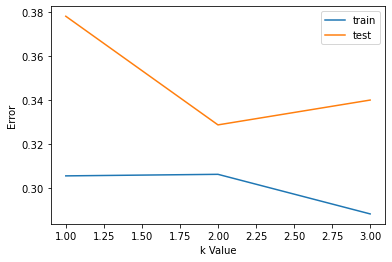

In [32]:
error1= []
error2= []
for k in range(1,4):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))
plt.plot(range(1,4),error1,label="train")
plt.plot(range(1,4),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [33]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.692524682651622

# Multiple Linear Regression

In [34]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [35]:
df_lg= pd.DataFrame()
df_lg['company_name']=company_name
df_lg['km_driven']=car_data['km_driven']
df_lg['fuel']=fuel
df_lg['seller_type']=seller_type
df_lg['transmission']=transmission
df_lg['owner']=owner

df_lg.head()

,company_name,km_driven,fuel,seller_type,transmission,owner
0,9,70000.0,4,1,1,0
1,9,50000.0,4,1,1,0
2,7,100000.0,1,1,1,0
3,3,46000.0,4,1,1,0
4,6,141000.0,1,1,1,2


In [36]:
df_lg.isnull().any()
df_lg['km_driven'] = df_lg['km_driven'].fillna(0)
df_lg.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3544 entries, 0 to 3543
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  3544 non-null   int64  
 1   km_driven     3544 non-null   float64
 2   fuel          3544 non-null   int64  
 3   seller_type   3544 non-null   int64  
 4   transmission  3544 non-null   int64  
 5   owner         3544 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 166.2 KB


In [37]:
df_lg.head()

,company_name,km_driven,fuel,seller_type,transmission,owner
0,9,70000.0,4,1,1,0
1,9,50000.0,4,1,1,0
2,7,100000.0,1,1,1,0
3,3,46000.0,4,1,1,0
4,6,141000.0,1,1,1,2


In [38]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(df_lg, selling_price, test_size= 0.2, random_state=0)  

In [39]:
x_train.isnull().any()

company_name    False
km_driven       False
fuel            False
seller_type     False
transmission    False
owner           False
dtype: bool

In [40]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

In [41]:
#Predicting the Test set result;  
y_pred= regressor.predict(x_test)  

In [42]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  

Train Score:  0.3296605135595685
Test Score:  0.31159363906198534


# Categorial Values/ Attribute

In [43]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(df1, price_range, test_size= 0.2, random_state=0)  

x_train.head()

,company_name,km_driven,fuel,seller_type,transmission,owner
3290,6,3,1,1,1,0
874,7,3,4,1,1,0
2596,14,0,4,1,1,0
154,2,1,4,1,1,2
1014,14,1,1,1,1,2


In [44]:
#Fitting the MLR model to the training set:  
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

In [45]:
#Predicting the Test set result;  
y_pred= regressor.predict(x_test)  

In [46]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))  

Train Score:  0.17650880921545153
Test Score:  0.17412663952628615
